## LIBs

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## DATA

In [189]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\titanic.csv")

In [191]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

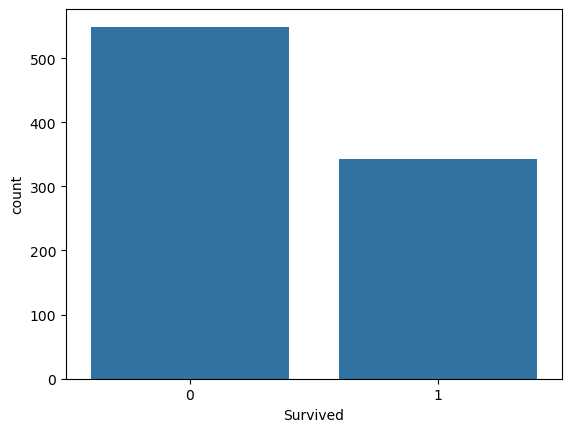

In [25]:
sns.countplot(x='Survived',data = df)

In [27]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

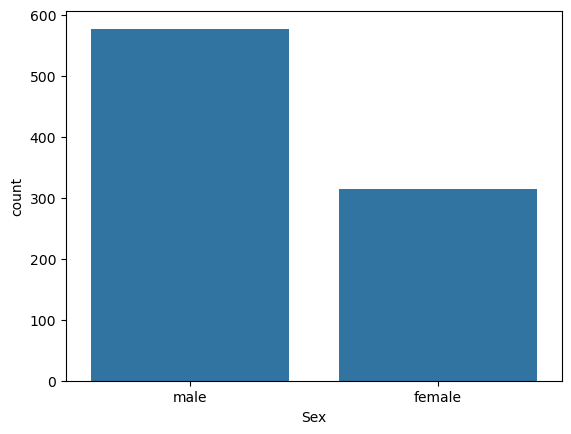

In [29]:
sns.countplot(x='Sex',data = df)

<Axes: xlabel='Survived', ylabel='count'>

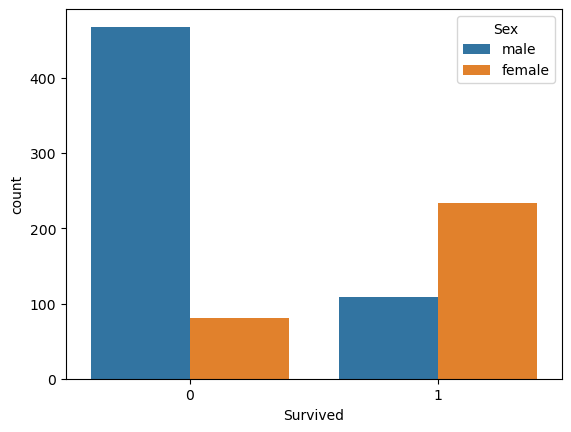

In [33]:
sns.countplot(x='Survived',hue = 'Sex',data = df)

In [35]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

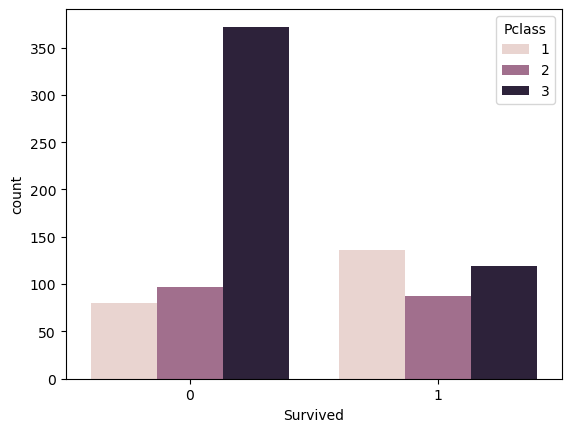

In [37]:
sns.countplot(x='Survived',hue = 'Pclass',data = df)

<Axes: >

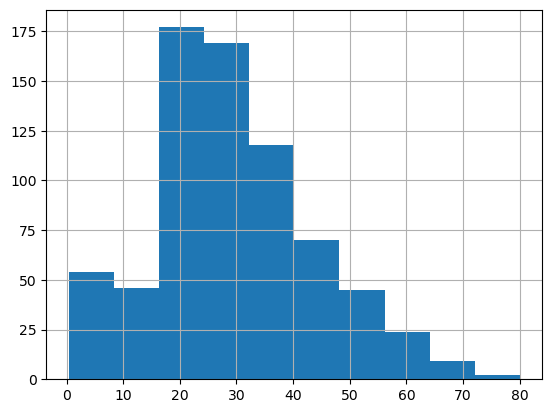

In [39]:
df.Age.hist()

<Axes: xlabel='Age'>

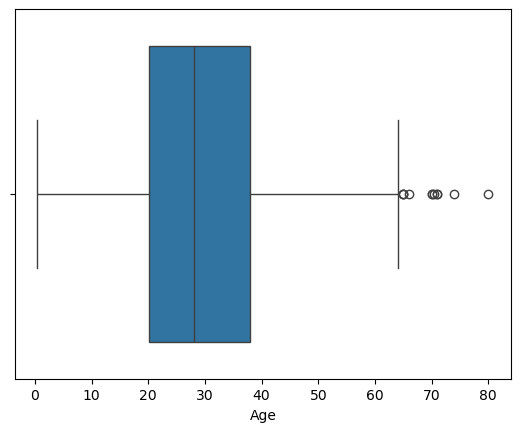

In [41]:
sns.boxplot(x= 'Age',data = df)

<Axes: xlabel='Fare'>

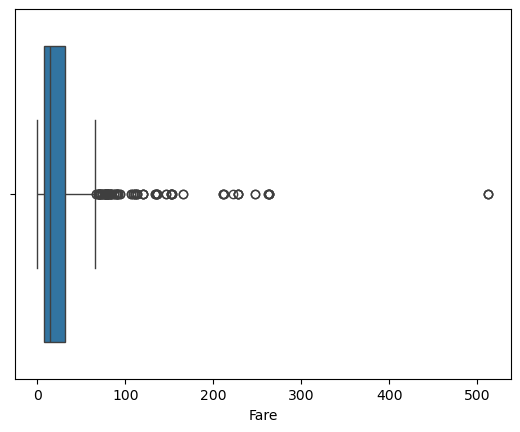

In [43]:
sns.boxplot(x= 'Fare',data = df)

## Preprocessing

### Handle Null Values

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

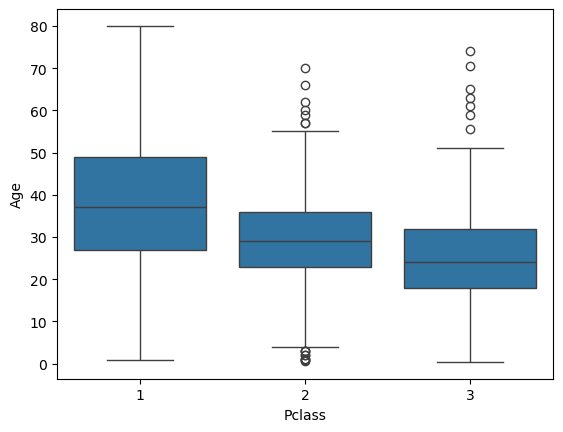

In [197]:
sns.boxplot(x='Pclass',y= 'Age',data = df)

In [198]:
def imput_nulls_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [201]:
df['Age']=df[['Age','Pclass']].apply(imput_nulls_age,axis = 1)

In [203]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
df.drop('Cabin',axis = 1, inplace = True)

In [207]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [209]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

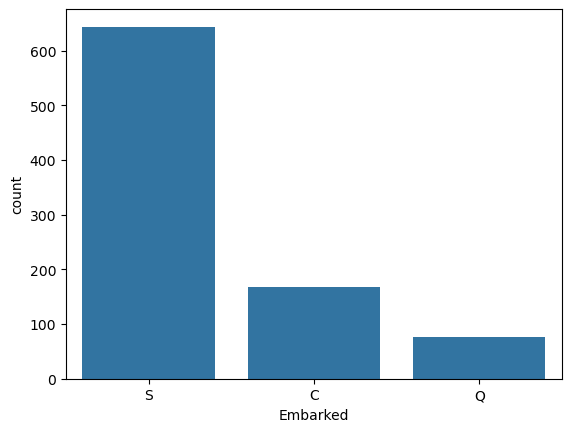

In [211]:
sns.countplot(x= 'Embarked',data=df)

In [213]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [215]:
df.Embarked.mode()[0]

'S'

In [217]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace = True)

In [219]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Outliers

In [222]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.100079,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.265936,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age'>

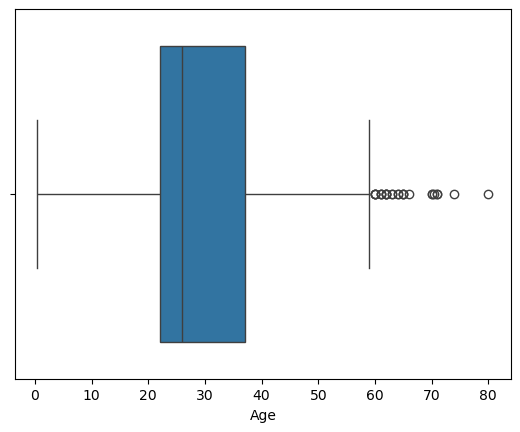

In [226]:
sns.boxplot(x='Age',data=df)

In [234]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers= df[(df['Age']<lower_bound)|(df['Age']>upper_bound)]
# remove
df = df[(df['Age']>=lower_bound)&(df['Age']<=upper_bound)]

<Axes: xlabel='Age'>

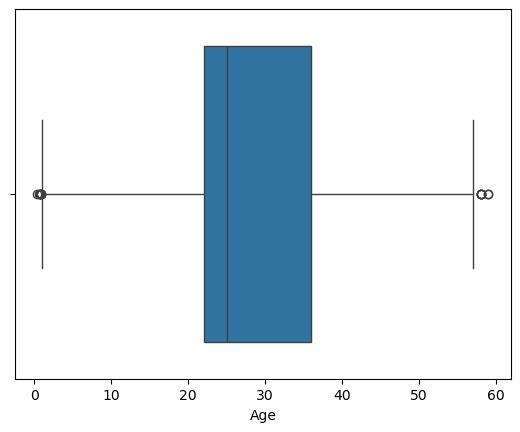

In [236]:
sns.boxplot(x='Age',data=df)

<Axes: xlabel='Fare'>

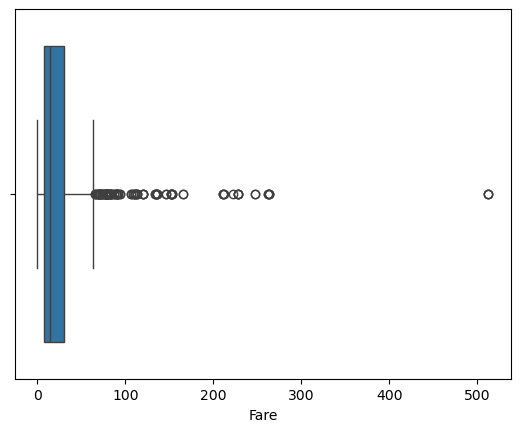

In [238]:
sns.boxplot(x='Fare',data=df)

In [240]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers= df[(df['Fare']<lower_bound)|(df['Fare']>upper_bound)]
# remove
df = df[(df['Fare']>=lower_bound)&(df['Fare']<=upper_bound)]

<Axes: xlabel='Fare'>

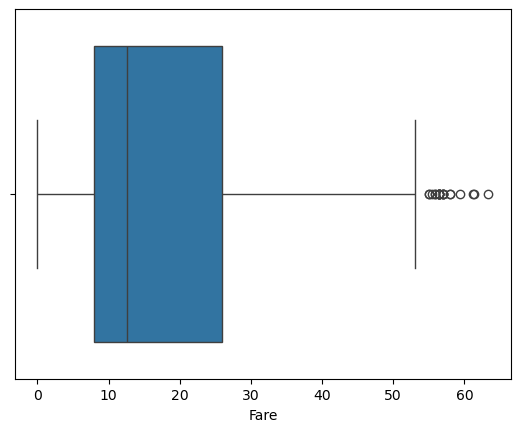

In [242]:
sns.boxplot(x='Fare',data=df)

### Handle Duplicate Values

In [245]:
df.duplicated().sum()

0

### ROI Col

In [247]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q


In [249]:
df.drop(['PassengerId','Name','Ticket'],axis = 1,inplace = True)

### Encoding

In [251]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q


In [253]:
from sklearn.preprocessing import LabelEncoder

In [255]:
## Call
encoder = LabelEncoder()

In [257]:
df['Sex']= encoder.fit_transform(df['Sex'])
df['Embarked']= encoder.fit_transform(df['Embarked'])

In [259]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,24.0,0,0,8.4583,1


### Splitting

In [262]:
## split the data into Features (x), labels (y)
x = df.drop('Survived',axis = 1) #Features (x)
y = df['Survived'] # labels (y)

In [264]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
5,3,1,24.0,0,0,8.4583,1


In [266]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [268]:
## Split the data (x,y) into train set ,and test set 
from sklearn.model_selection import train_test_split

In [270]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state=0)

In [272]:
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('--'*20)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (602, 7)
y_train shape:  (602,)
----------------------------------------
x_test shape:  (151, 7)
y_test shape:  (151,)


## Classification -- LogisticRegression

### Train

In [275]:
from sklearn.linear_model import LogisticRegression

In [277]:
## call
model = LogisticRegression()

In [279]:
#train/fit the model --> train set (x_train,y_train)
model.fit(x_train,y_train)

LogisticRegression()

### Test

In [282]:
# test / predict --> test set (x_test)
y_pred = model.predict(x_test)

In [284]:
y_pred # model predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [286]:
y_test

773    0
843    0
476    0
90     0
500    0
      ..
425    0
177    0
135    0
682    0
582    0
Name: Survived, Length: 151, dtype: int64

### Preformance [Train & Test]

In [289]:
from sklearn.metrics import accuracy_score , classification_report

In [291]:
accuracy_score(y_test, y_pred) #real date , model predictions

0.8145695364238411

In [293]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        97
           1       0.77      0.69      0.73        54

    accuracy                           0.81       151
   macro avg       0.80      0.79      0.79       151
weighted avg       0.81      0.81      0.81       151



In [295]:
y_p_trian = model.predict(x_train)

In [297]:
accuracy_score(y_train, y_p_trian) #real date , model predictions

0.7940199335548173